(C:quantification)=
# Quantification

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex = True)

La quantification (_quantization_) consiste à transformer un signal à valeurs continues en un signal à valeurs discrètes.
Ces valeurs discrètes correspondent à des « niveaux de quantification ».
En pratique, elles sont représentées par un code binaire,
c'est pourquoi le nombre de niveaux de quantification est souvent une puissance de deux.

## Principe

La « quantification uniforme par arrondi » est la méthode la plus plus simple : les niveaux de quantification sont répartis uniformément et distants de la même valeur $q$ (appelée « pas de quantification »).
Les valeurs que prend le signal non quantifié $x(t)$ sont arrondies au niveau de quantification le plus proche :

$$
x_q(t) = q \times \left\lfloor \frac{x}{q}+\frac{1}{2} \right\rfloor
$$

où $\lfloor\cdot\rfloor$ est la partie entière.

La {numref}`F:quantification:signal` représente un exemple de quantification uniforme par arrondi pour $K=8$ niveaux de quantification et $q=0,3$.

```{glue:figure} G:quantification:signal
:name: "F:quantification:signal"

Exemple de quantification d'un signal $x(t)$ sur $N=8$ niveaux.
```

La « caractéristique de quantification » illustre la quantification utilisée.
C'est la courbe représentant $x_q$ en fonction de $x$, elle a donc la forme d'une fonction en escalier ({numref}`F:quantification:caracteristique`).

```{glue:figure} G:quantification:caracteristique
:name: "F:quantification:caracteristique"

Caractéristique de quantification d'une quantification uniforme par arrondi sur $N=8$ niveaux.
```

Pour éviter la saturation du signal (comme c'est le cas dans l'exemple de la {numref}`F:quantification:signal`),
le choix du niveau de quantification $q$ doit être déterminé en fonction des amplitudes extrêmes du signal $x_\mathrm{min}$ et $x_\mathrm{max}$
et du nombre de niveaux de quantification $K$, tel que : $q = (x_\mathrm{min}-x_\mathrm{max})/(K-1)$.


## Erreur de quantification

On avait vu dans le chapitre {ref}`C:Echantillonnage` que l'échantillonnage n'introduisait aucune erreur
(à condition de respecter la condition $f_e > 2 f_\mathrm{max}$).
Ce n'est pas le cas pour la quantification :
elle engendre une erreur puisque le signal quantifié $x_q$ n'a pas les mêmes valeurs que le signal non quantifié $x$.
La différence $\varepsilon(t) = x(t) - x_q(t)$ est appelée « erreur de quantification » (cf. {numref}`F:quantification:erreur`).

```{glue:figure} G:quantification:erreur
:name: "F:quantification:erreur"

Erreur de quantification sur l'exemple précédent (en rouge).
```

La valeur maximale de cette erreur est la moitié du pas de quantification : $q/2$.
Sa moyenne est (statistiquement) nulle et sa puissance est (statistiquement) égale à $q^2/12$ (dans l'hypothèse d'un signal $x(t)$ distribué uniformément).


## Qantification non uniforme

Dans certaines applications, le signal présente rarement de grandes amplitudes mais il est souvent d'amplitude faible.
C'est le cas par exemple des signaux de parole.
Aussi, il est intéressant d'avoir une quantification où le pas de quantification est différent dans les faibles et les grandes amplitudes.
Plus précisément, on privilégiera un pas de quantifcation faible pour les faibles amplitudes et grand pour les grandes amplitudes.
Cela aboutit à une quantification non uniforme.

Par exemple, l'application d'une transformation non linéaire sur le signal avant une quantification uniforme
correspond à une quantification non uniforme.
En téléphonie, la « loi A » permet d'obtenir la quantification représentée {numref}`F:quantification:caracteristique-A`.

```{glue:figure} G:quantification:caracteristique-A
:name: "F:quantification:caracteristique-A"

Caractéristique de quantification d'une quantification uniforme par arrondi sur $N=8$ niveaux.
```

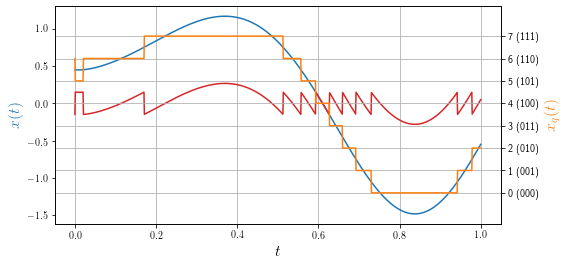

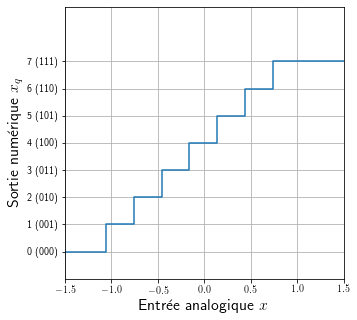

In [2]:
# Signal
N = 1000
n = np.linspace(0,1,N)
x = 1.1 * np.sin(2*np.pi*n**1.5) - n + .45

# Caractéristique de quantification
y = np.arange(-2, 2, .01)

# Quantification uniforme par arrondi
q = .3
K = 8
xmin = -K/2*q
xmax = (K/2-1)*q
qticks = np.arange(xmin, xmax+q, q)
def quantif(x, q, K):
    x = np.clip(x, xmin, xmax)
    return q * np.floor(x/q+.5)
xq = quantif(x, q, K)
yq = quantif(y, q, K)

# Tick label
qticklabels = (qticks-xmin)/q
qticklabels = qticklabels.astype(int)
yqticklabel = [f"{i} ({i:0>3b})" for i in qticklabels]

print()

# Signal quantifié
fig, ax = plt.subplots(figsize=(8,4))
axq = ax.twinx()
clr, clrq = "tab:blue", "tab:orange"
ax.plot(n, x, color=clr)
ax.set_xlabel("$t$", fontsize=16)
ax.set_ylabel("$x(t)$", color=clr, fontsize=16)
ax.grid(axis="x")
axq.plot(n, xq, color=clrq)
axq.set_ylabel("$x_q(t)$", color=clrq, fontsize=16)
axq.set_yticks(qticks)
axq.set_yticklabels(yqticklabel)
axq.set_ylim(ax.get_ylim())
axq.grid(axis="y")
glue("G:quantification:signal", fig, display=False)
ax.plot(n, x-xq, color="tab:red")
glue("G:quantification:erreur", fig, display=False)

# Caractéristique
fig, ax = plt.subplots(figsize=(5,5))
ax.step(y, yq)
ax.set_yticks(qticks)
ax.set_yticklabels(yqticklabel)
ax.set_xlabel("Entrée analogique $x$", fontsize=16)
ax.set_ylabel("Sortie numérique $x_q$", fontsize=16)
ax.set_xlim([-(K/2+1)*q, (K/2+1)*q])
ax.set_ylim([-(K/2+1)*q, (K/2+1)*q])
ax.grid()
glue("G:quantification:caracteristique", fig, display=False)

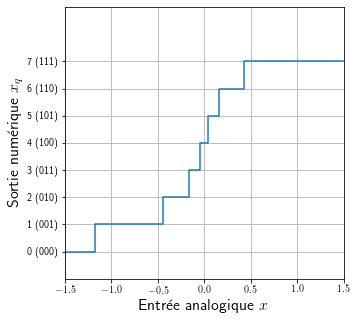

In [9]:

K = 8
A = 10

# Quantification non uniforme (loi A)
y = np.arange(-1.5, 1.5, .01)
xmin = -K/2*q
xmax = (K/2-1)*q
q = (xmax-xmin)/(K-1)
Ay = A*np.abs(y)
den = 1+np.log(A)
z = np.where(np.abs(y)<1/A,
             np.sign(y) * Ay / den,
             np.sign(y) * (1+np.log(Ay)) / den)
yq = quantif(z, q, K)

# Tick label
qticks = np.arange(xmin, xmax+q, q)
qticklabels = (qticks-xmin)/q
qticklabels = qticklabels.astype(int)
yqticklabel = [f"{i} ({i:0>3b})" for i in qticklabels]

# Caractéristique
fig, ax = plt.subplots(figsize=(5,5))
ax.step(y, yq)
ax.set_yticks(qticks)
ax.set_yticklabels(yqticklabel)
ax.set_xlabel("Entrée analogique $x$", fontsize=16)
ax.set_ylabel("Sortie numérique $x_q$", fontsize=16)
ax.set_xlim([-(K/2+1)*q, (K/2+1)*q])
ax.set_ylim([-(K/2+1)*q, (K/2+1)*q])
ax.grid()
glue("G:quantification:caracteristique-A", fig, display=False)